<a href="https://colab.research.google.com/github/IamBhanuYenumula/Byen_DataScience_expo/blob/main/Feature_selection_using_Chi_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/IamBhanuYenumula/Byen_DataScience_expo/main/Datasets/Titanic.csv"

df = pd.read_csv(url) [['Pclass','Sex','SibSp','Parch','Embarked','Survived']]

print(df.head())

   Pclass     Sex  SibSp  Parch Embarked  Survived
0       3    male      1      0        S         0
1       1  female      1      0        C         1
2       3  female      0      0        S         1
3       1  female      1      0        S         1
4       3    male      0      0        S         0


In [17]:
from scipy.stats import chi2_contingency

score = []
for i in df.columns[:-1]:
  contingency_table = pd.crosstab(df['Survived'],df[i])

  p_value = chi2_contingency(contingency_table)[1]
  score.append(p_value)

print(score)

[4.549251711298793e-23, 1.1973570627755645e-58, 1.5585810465902116e-06, 9.703526421039997e-05, 1.769922284120912e-06]


<Axes: >

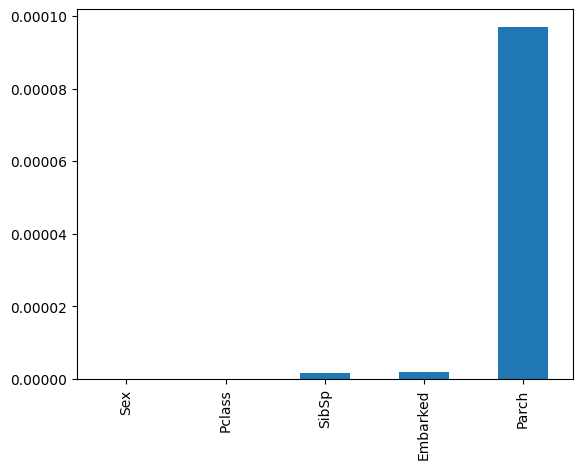

In [19]:
pd.Series(score,index=df.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

using sklearn

(array([54.46586599, 92.70244698,  1.23604038, 10.09749911,  9.75545583]), array([1.58171493e-13, 6.07783826e-22, 2.66235537e-01, 1.48470676e-03,
       1.78791305e-03]))
Pclass      1.581715e-13
Sex         6.077838e-22
SibSp       2.662355e-01
Parch       1.484707e-03
Embarked    1.787913e-03
dtype: float64


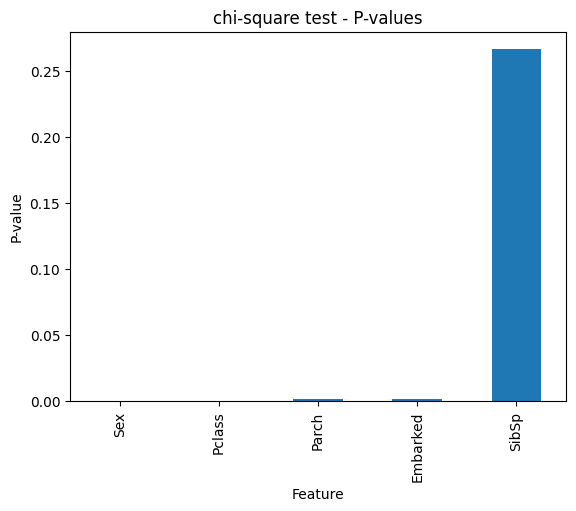

In [28]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()
df = df.apply(le.fit_transform)

X = df.drop('Survived', axis = 1)
y = df['Survived']

chi_scores = chi2(X,y)
print(chi_scores)

p_values = pd.Series(chi_scores[1], index = X.columns)
print(p_values)
p_values.sort_values(inplace=True)

p_values.plot.bar()
plt.title('chi-square test - P-values')
plt.xlabel("Feature")
plt.ylabel('P-value')
plt.show()